# Customer Segmentation

## We will use K-Means for customer segmentation...

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline

c:\users\rohit\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
np.random.seed(0)

In [5]:
# n_samples= 5000
# fxed centre location= [[4, 4], [-2, -1], [2, -3],[1,1]]
# std = 0.9

X,y= make_blobs(n_samples=5000,centers=[[4, 4], [-2, -1], [2, -3],[1,1]],cluster_std=0.9)

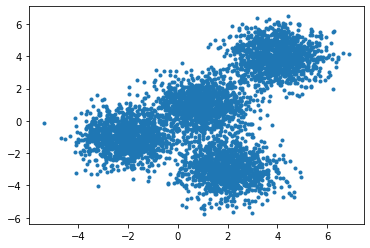

In [6]:
plt.scatter(X[:,0],X[:,1],marker='.')

In [7]:
k_means=KMeans(init='k-means++',n_clusters=4,n_init=12)

In [8]:
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

In [9]:
k_means_labels=k_means.labels_
k_means_labels

array([0, 2, 2, ..., 1, 0, 0])

In [10]:
k_means_cluster_centers= k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03375169, -0.99827293],
       [ 3.97334234,  3.98758687],
       [ 1.99876902, -3.01796355],
       [ 0.96959198,  0.98543802]])

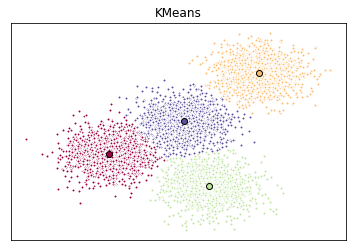

In [11]:
fig=plt.figure(figsize=(6,4))
colors=plt.cm.Spectral(np.linspace(0,1,len(set(k_means_labels))))
ax=fig.add_subplot(1,1,1)

for k,col in zip(range(len([[4,4],[-2,-1],[2,-3],[1,1]])),colors):
    my_members=(k_means_labels==k)
    cluster_center=k_means_cluster_centers[k]
    ax.plot(X[my_members,0],X[my_members,1],'w',markerfacecolor=col,marker='.')
    ax.plot(cluster_center[0],cluster_center[1],'o',markerfacecolor=col,markeredgecolor='k',markersize=6)
ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.show()    

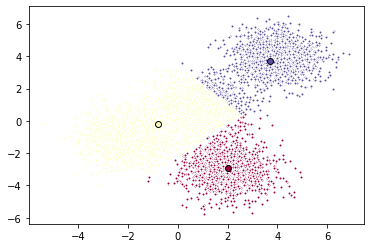

In [17]:
k_means3=KMeans(init='k-means++',n_clusters=3,n_init=12)
k_means3.fit(X)
fig=plt.figure(figsize=(6,4))
colors=plt.cm.Spectral(np.linspace(0,1,len(set(k_means3.labels_))))
ax=fig.add_subplot(1,1,1)

for k,col in zip(range(len(k_means3.cluster_centers_)),colors):
    my_members=(k_means3.labels_==k)
    cluster_center=k_means3.cluster_centers_[k]
    ax.plot(X[my_members,0],X[my_members,1],'w',markerfacecolor=col,marker='.')
    ax.plot(cluster_center[0],cluster_center[1],'o',markerfacecolor=col,markeredgecolor='k',markersize=6)
plt.show()    

## Now lets go for the customer segmentation...

In [18]:
import pandas as pd

In [21]:
df_1=pd.read_csv(r'E:\Mohit\Coursera\Machine Learning with Python IBM\Datasets\Cust_Segmentation.csv')
df_1.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [20]:
# address field here will not be used for euclidean distance caln, lets drop it...

In [23]:
df=df_1.drop('Address',axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [24]:
# to normalise the dataset we use, StandardScaler...

In [28]:
from sklearn.preprocessing import StandardScaler
X=df.values[:,1:]
X=np.nan_to_num(X)
Cluster_data=StandardScaler().fit_transform(X)
Cluster_data

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [33]:
cluster_num=3
k_means=KMeans(init="k-means++",n_clusters=cluster_num,n_init=12)
k_means.fit(X)
labels=k_means.labels_
print(labels)

[0 2 0 0 1 2 0 2 0 2 2 0 0 0 0 0 0 0 2 0 0 0 0 2 2 2 0 0 2 0 2 0 0 0 0 0 0
 0 0 2 0 2 0 1 0 2 0 0 0 2 2 0 0 2 2 0 0 0 2 0 2 0 2 2 0 0 2 0 0 0 2 2 2 0
 0 0 0 0 2 0 2 2 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0
 0 0 0 0 0 0 2 0 2 2 0 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 2 0
 0 0 0 0 2 0 0 2 0 2 0 0 2 1 0 2 0 0 0 0 0 0 1 2 0 0 0 0 2 0 0 2 2 0 2 0 2
 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 2 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 0 2 0 2 2 0 0 0 0 0 0
 0 0 0 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 2 0 2 2 0
 0 0 0 0 2 0 0 0 0 0 0 2 0 0 2 0 0 2 0 0 0 0 0 2 0 0 0 1 0 0 0 2 0 2 2 2 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 2 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 1
 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 2 0 1 0 0 0 0 2 0 2 2 2 0 0 2 2 0 0 0 0 0 0
 0 2 0 0 0 0 2 0 0 0 2 0 

## These were the labels assigned to each row of the DataFrame...